In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
import seaborn as sns
import pandas as pd
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

# Partie I

In [2]:
a = np.array([1,42,18])
b = np.arange(10)
b2 = np.arange(2,5,.5)
c = np.linspace(0,1,11)
d = np.ones(6)
d = np.zeros(5)
e = np.full(5,3)

print(a)
print(b)
print(b2)
print(c)
print(d)
print(e)

[ 1 42 18]
[0 1 2 3 4 5 6 7 8 9]
[2.  2.5 3.  3.5 4.  4.5]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0. 0. 0. 0. 0.]
[3 3 3 3 3]


In [3]:
np.concatenate((a,b))

array([ 1, 42, 18,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [4]:
#créer la même array de dimension 2.
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
B = np.array([1,2,3,4,5,6,7,8,9]).reshape((3,3))

print(A)
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [5]:
np.vstack((A,a))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [ 1, 42, 18]])

In [6]:
np.hstack((A,A))

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6],
       [7, 8, 9, 7, 8, 9]])

In [7]:
np.ones((2,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [8]:
np.dot(A,a)

array([139, 322, 505])

In [9]:
A.sum(axis=0), A.sum(axis=1)

(array([12, 15, 18]), array([ 6, 15, 24]))

## Questions 

In [4]:
#Question 1. — Créer une matrice de taille 8 × 8 contenant des 0 et des 1 à la manière d’un échiquier.
ligne = [0,1]*4
def reshape(ligne):
    new = []
    for element in ligne:
        if element==0: new.append(1)
        else: new.append(0)
    return new 
M = np.array((ligne + reshape(ligne))*4).reshape((8,8))
M

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

In [10]:
M = np.array([0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0]*4).reshape((8,8))
M

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

In [21]:
M = np.arange(1,21).reshape((5,4)).T
print(M)

np.hstack((np.hstack((np.vstack((M[0:3,1:][1:],M[0:3,1:][0:1]))[:,0:1] ,np.vstack((M[0:3,1:][1:],M[0:3,1:][0:1]))[:,3:])), np.vstack((M[0:3,1:][1:],M[0:3,1:][0:1]))[:,1:2]))

[[ 1  5  9 13 17]
 [ 2  6 10 14 18]
 [ 3  7 11 15 19]
 [ 4  8 12 16 20]]


array([[ 6, 18, 10],
       [ 7, 19, 11],
       [ 5, 17,  9]])

In [31]:
M = np.arange(1,21).reshape((5,4)).T

def find_matrix(M):
    """ M is 4 x 4
    """
    if M.shape != (4,5): 
        print("La matrice n'a pas la bonne dimension")
        return None
    else:
        N = M.copy()
        N[0], N[3] = M[3], M[0]
        N = N[1:, [1,4,2]]
        return N

print(find_matrix(M))

[[ 6 18 10]
 [ 7 19 11]
 [ 5 17  9]]


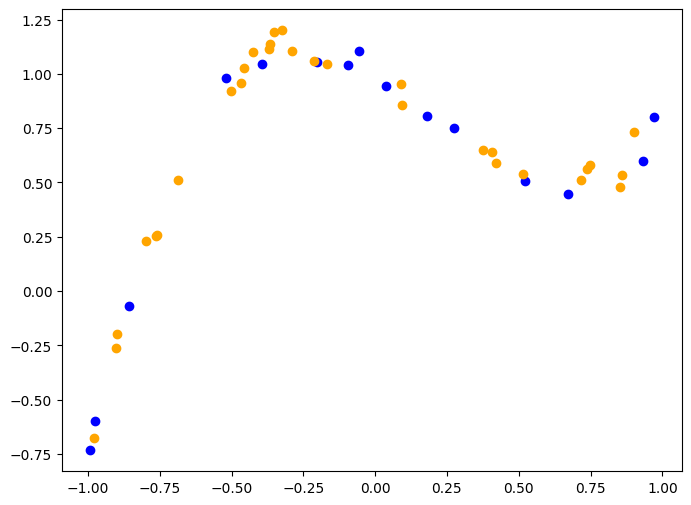

In [12]:
def g(x):
    return (3/2)*x**3 - x**2 - (3/4)*x + 1

x = np.random.uniform(-1, 1, size = 15)
eps = np.random.normal(0, 1, 15)
Y = g(x) + eps / 20

x_test = np.random.uniform(-1, 1, size = 30)
eps_test = np.random.normal(0, 1, 30)
Y_test = g(x_test) + eps_test / 20

plt.figure(figsize=(8,6))
plt.scatter(x, Y, color = 'blue')
plt.scatter(x_test, Y_test, color = 'orange')
plt.show()

In [13]:
f = LinearRegression()
X = x[:,np.newaxis]
X_test = x_test[:,np.newaxis]

f.fit(X,Y)
print("Les coefficients de f sont :", f.coef_, f.intercept_)

Les coefficients de f sont : [0.45923007] 0.5941638805272127


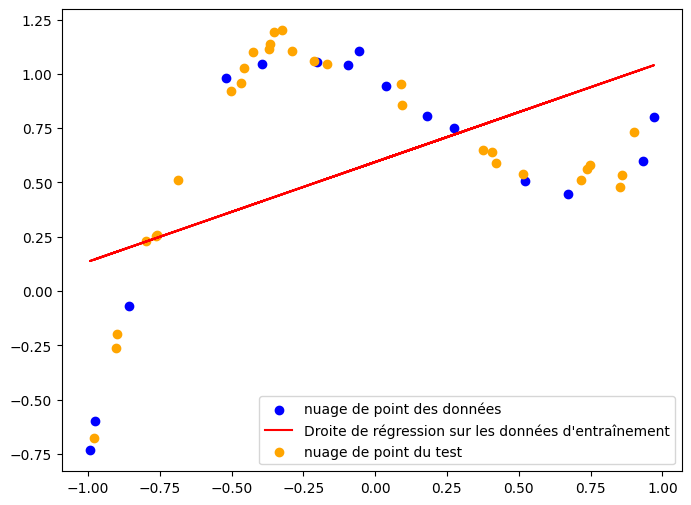

In [14]:
prediction = f.predict(X)
prediction_test = f.predict(X_test)
plt.figure(figsize=(8,6))
plt.scatter(x, Y, color = 'blue', label = "nuage de point des données")
plt.plot(X, prediction, color = 'red', label = "Droite de régression sur les données d'entraînement")
plt.scatter(x_test, Y_test, color = 'orange', label = "nuage de point du test")
plt.legend()
plt.show()

In [15]:
def MSE(Y_predict, Y_true): 
    return np.mean((Y_predict - Y_true)**2)

print("l’erreur moyenne d’apprentissage est : ", MSE(prediction, Y))
print("l’erreur moyenne de test est : ", MSE(prediction_test, Y_test))

l’erreur moyenne d’apprentissage est :  0.24598859236824733
l’erreur moyenne de test est :  0.23470172009097656


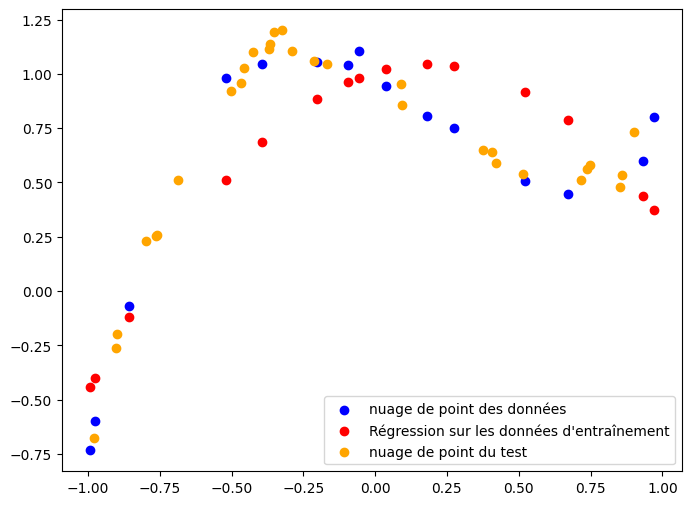

l’erreur moyenne d’apprentissage est :  0.07734143381793927
l’erreur moyenne de test est :  0.08459991832285475


In [16]:
psi = PolynomialFeatures(2,include_bias=False).fit_transform
f2 = LinearRegression()
f2.fit(psi(X), Y)
prediction2 = f2.predict(psi(X))
prediction_test2 = f2.predict(psi(X_test))

plt.figure(figsize=(8,6))
plt.scatter(x, Y, color = 'blue', label = "nuage de point des données")
plt.scatter(X, prediction2, color = 'red', label = "Régression sur les données d'entraînement")
plt.scatter(x_test, Y_test, color = 'orange', label = "nuage de point du test")
plt.legend()
plt.show()

print("l’erreur moyenne d’apprentissage est : ", MSE(prediction2, Y))
print("l’erreur moyenne de test est : ", MSE(prediction_test2, Y_test))

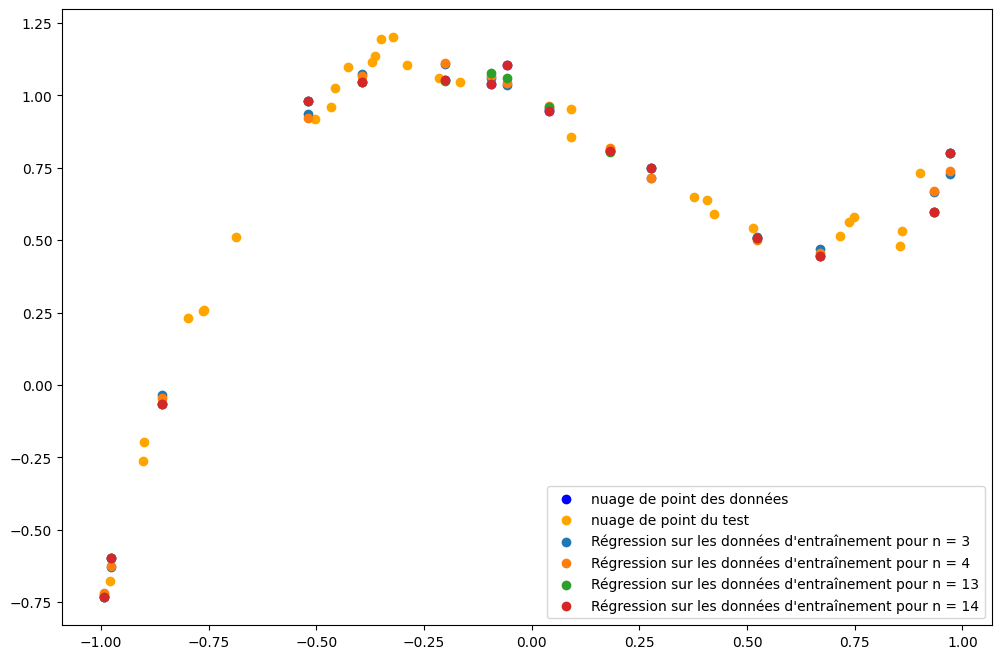

In [17]:
def predicteur(n):
    psi_transform = PolynomialFeatures(n, include_bias=False).fit_transform
    g = LinearRegression()
    g.fit(psi_transform(X), Y)
    pred = g.predict(psi_transform(X))
    pred_test = g.predict(psi_transform(X_test))
    return g, psi_transform

plt.figure(figsize=(12,8))
plt.scatter(x, Y, color = 'blue', label = "nuage de point des données")
plt.scatter(x_test, Y_test, color = 'orange', label = "nuage de point du test")
for n in [3,4,13,14]:
    func, psi = predicteur(n)
    pred = func.predict(psi(X))
    plt.scatter(X, pred, label = f"Régression sur les données d'entraînement pour n = {n}")
plt.legend()
plt.show()

In [32]:
func, psi = predicteur(3)
func.coef_

array([-0.84826375, -0.9812089 ,  1.62785323])

In [19]:
func2, psi = predicteur(14)
func2.coef_

array([-2.32903151e+00, -2.65900910e+01,  1.14560539e+02,  9.86752795e+02,
       -2.23106696e+03, -1.19862012e+04,  1.45719493e+04,  5.77250279e+04,
       -4.00201960e+04, -1.24176978e+05,  4.64287109e+04,  1.20363037e+05,
       -1.89361475e+04, -4.29651183e+04])

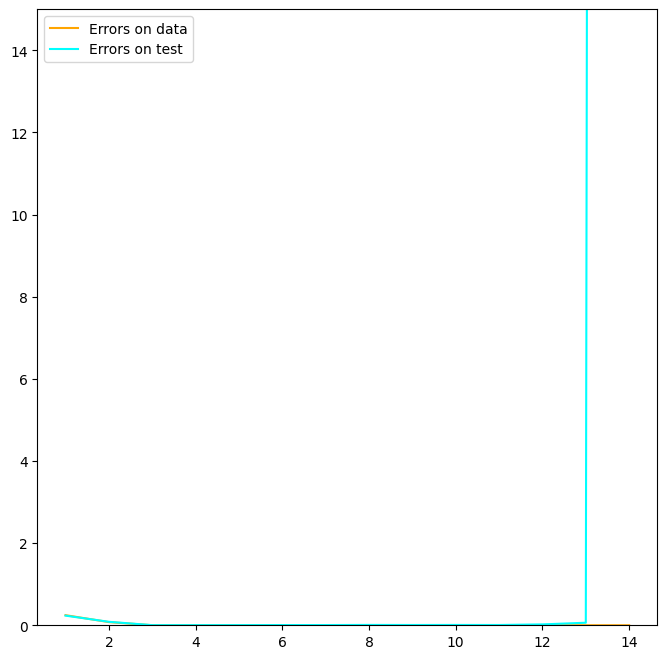

In [20]:
errors = []
errors_test = []
for n in np.arange(14) + 1: 
    func, psi = predicteur(n)
    pred = func.predict(psi(X))
    pred_test = func.predict(psi(X_test))
    errors.append(MSE(pred,Y))
    errors_test.append(MSE(pred_test,Y_test))
plt.figure(figsize=(8,8))
plt.plot(np.arange(14) + 1, errors, color = "orange", label = "Errors on data")
plt.plot(np.arange(14) + 1, errors_test, color = "cyan", label = "Errors on test")
plt.ylim(0,15)
plt.legend()
plt.show()

Régularisation Lasso : 

$ \hat{f} = \text{argmin} \{ \frac{1}{2m} \displaystyle \sum _{i=1} ^m (Y_i - f(X_i) )^2 + \alpha \displaystyle \sum _{i=1} ^n |a_k| \}$

/Users/augustincablant/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.782e-03, tolerance: 4.909e-04
  model = cd_fast.enet_coordinate_descent(


[-0.76479184 -0.81731084  1.30570973 -0.28953313  0.15748738 -0.34103042
 -0.12995622  0.0022956  -0.04868082  0.17170045  0.11202431  0.21650489
  0.26026145  0.21538423]


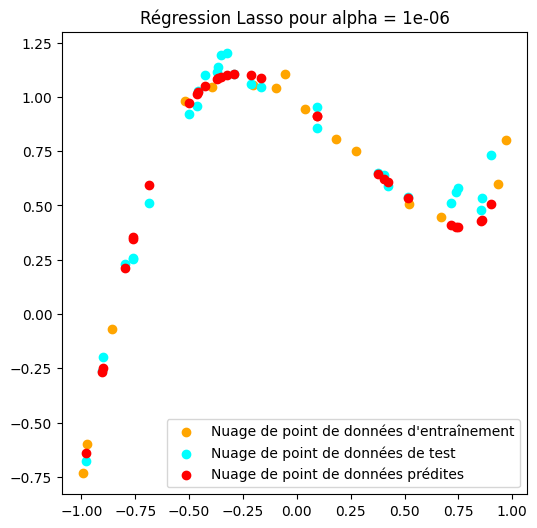

<Figure size 640x480 with 0 Axes>

[-0.7589262  -0.82014607  1.2731282  -0.2885281   0.15782522 -0.30987771
 -0.04852019 -0.         -0.04240034  0.12151463  0.03650438  0.21264658
  0.27071234  0.23992789]


/Users/augustincablant/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.483e-03, tolerance: 4.909e-04
  model = cd_fast.enet_coordinate_descent(


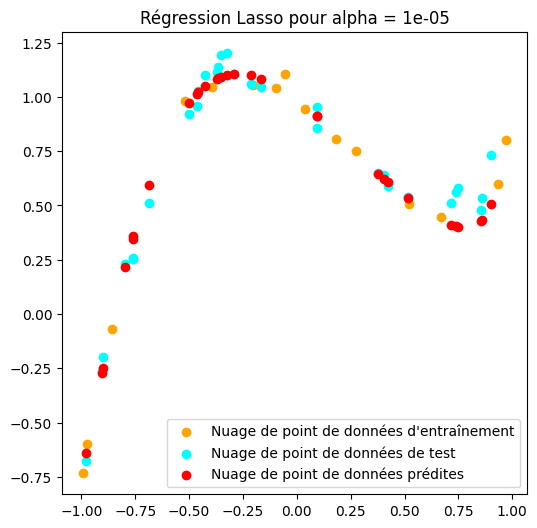

<Figure size 640x480 with 0 Axes>

[-0.74316947 -0.82798087  1.19589698 -0.40528632  0.22614473 -0.
  0.         -0.          0.          0.          0.          0.
  0.19231234  0.36979945]


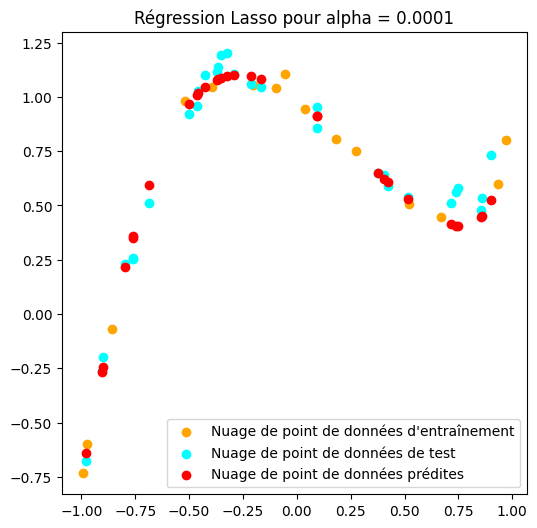

<Figure size 640x480 with 0 Axes>

[-0.63751345 -1.01159663  0.77076161 -0.          0.68361056 -0.
  0.          0.          0.          0.          0.          0.
  0.          0.0598693 ]


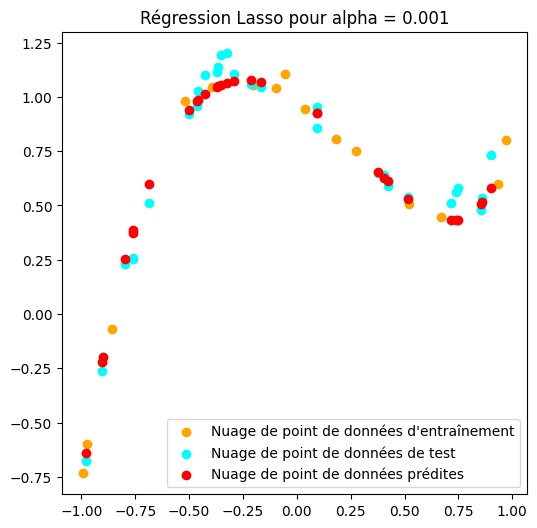

<Figure size 640x480 with 0 Axes>

[-0.1665334  -0.92370099  0.         -0.          0.44965345 -0.
  0.49778895 -0.          0.         -0.          0.         -0.
  0.         -0.        ]


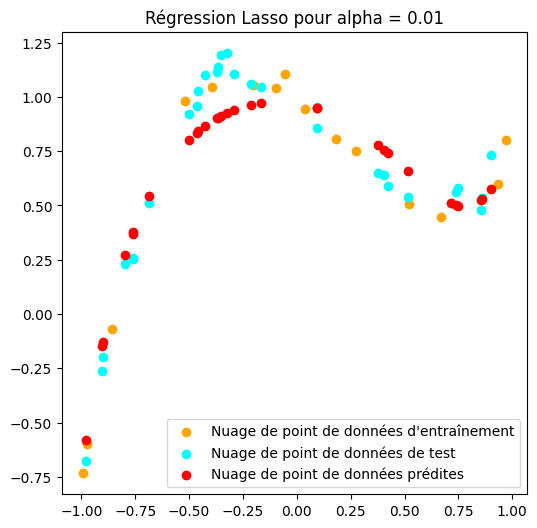

<Figure size 640x480 with 0 Axes>

[ 0.         -0.39589431  0.03228949 -0.          0.31509798 -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.        ]


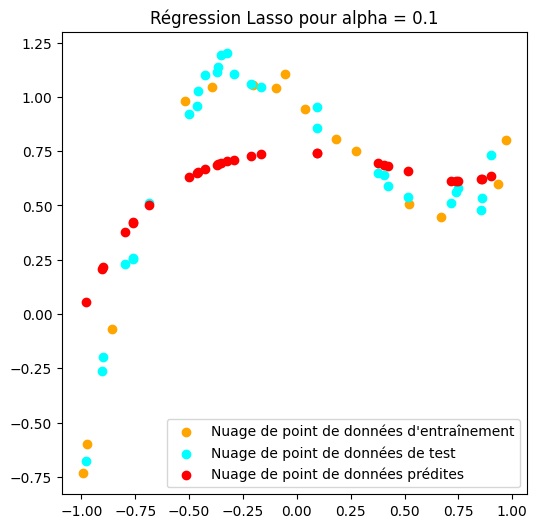

<Figure size 640x480 with 0 Axes>

[ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.]


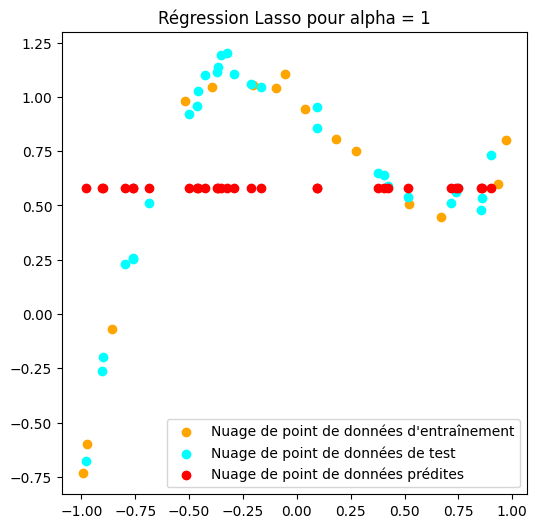

<Figure size 640x480 with 0 Axes>

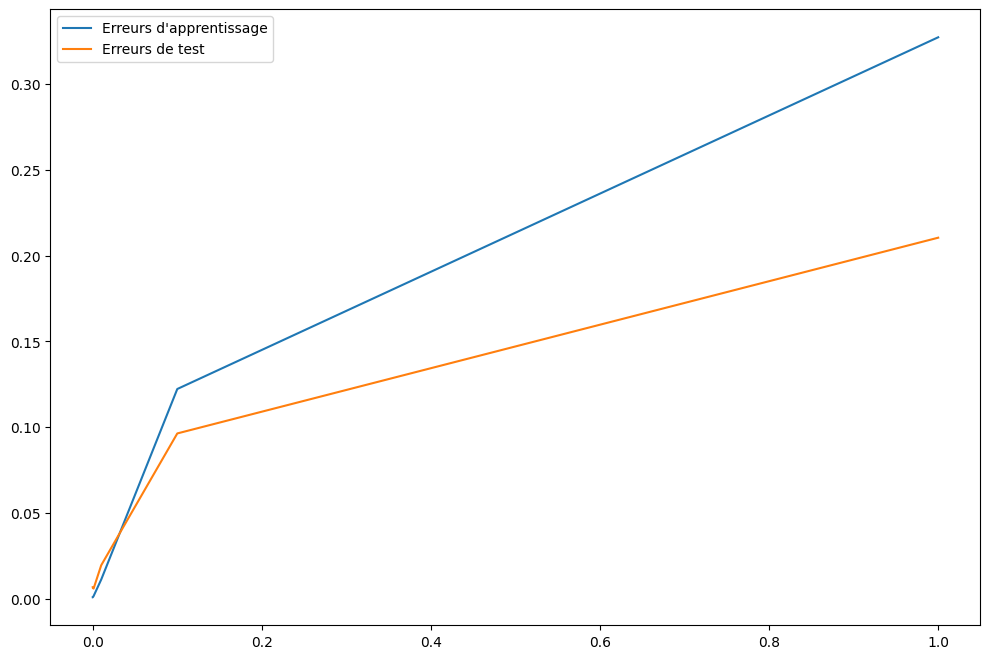

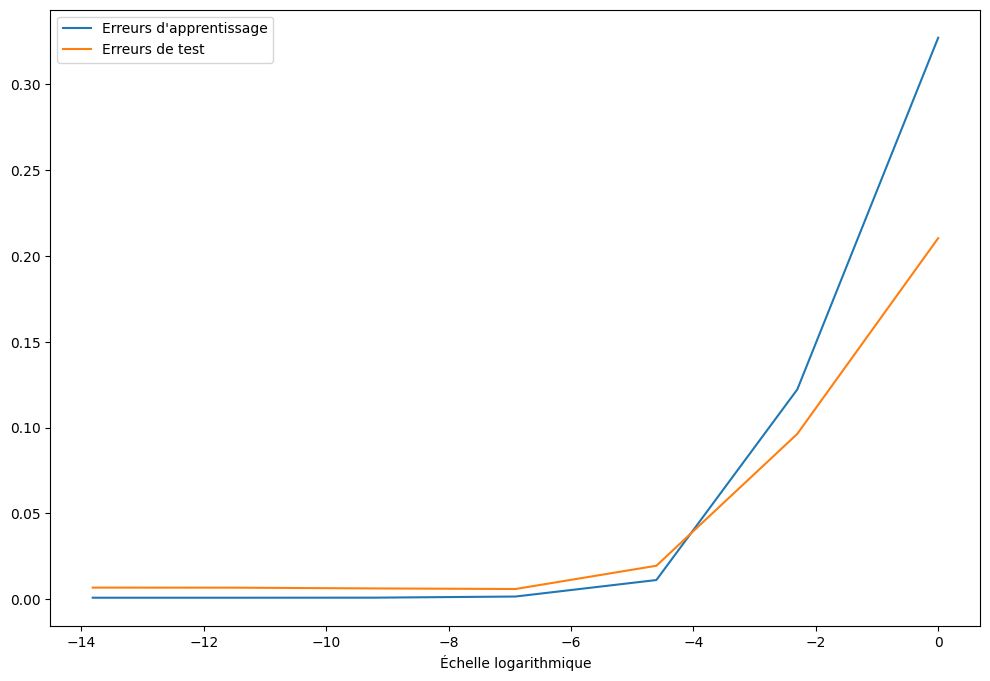

In [40]:
n = 14
Alpha = [10**(-6), 10**(-5), 10**(-4), 10**(-3), 10**(-2), 10**(-1), 1]
errors = []
test_errors = []
for alpha in Alpha:
    f = Lasso(alpha)
    psi_transform = PolynomialFeatures(n, include_bias=False).fit_transform
    f.fit(psi_transform(X), Y)
    pred = f.predict(psi_transform(X))
    pred2 = f.predict(psi_transform(X_test))
    errors.append(MSE(pred,Y))
    test_errors.append(MSE(pred2,Y_test))
    print(f.coef_)
    plt.figure(figsize=(6,6))
    plt.scatter(X, Y, color = "orange", label = "Nuage de point de données d'entraînement")
    plt.scatter(X_test, Y_test, color = "cyan", label = "Nuage de point de données de test")
    plt.scatter(X_test, pred2, color = "red", label = "Nuage de point de données prédites")
    plt.title(f"Régression Lasso pour alpha = {alpha}")
    plt.legend()
    plt.figure()
    plt.show()

plt.figure(figsize=(12,8))
plt.plot(Alpha, errors, label = "Erreurs d'apprentissage")
plt.plot(Alpha, test_errors, label = "Erreurs de test")
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(np.log(Alpha), errors, label = "Erreurs d'apprentissage")
plt.plot(np.log(Alpha), test_errors, label = "Erreurs de test")
plt.xlabel("Échelle logarithmique")
plt.legend()
plt.show()

Plus alpha est petit et meilleur est la prédiction !

# Partie II

In [3]:
iris = sns.load_dataset("iris")
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
35,5.0,3.2,1.2,0.2,setosa
114,5.8,2.8,5.1,2.4,virginica
76,6.8,2.8,4.8,1.4,versicolor
72,6.3,2.5,4.9,1.5,versicolor
116,6.5,3.0,5.5,1.8,virginica
16,5.4,3.9,1.3,0.4,setosa
78,6.0,2.9,4.5,1.5,versicolor
48,5.3,3.7,1.5,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
21,5.1,3.7,1.5,0.4,setosa


Il s’agit donc d’un problème de classification: on souhaite construire un prédicteur
prédisant l’espèce en fonction des autres caractéristiques.

Nous souhaitons dans un premier temps simplifier le jeu de données en réduisant la dimension de l’espace des entrées
de 4 à 2. Il s’agit donc de déterminer quelles sont les deux variables explicatives qui semblent les plus prometteuses
pour la prédiction de l’espèce.

/Users/augustincablant/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


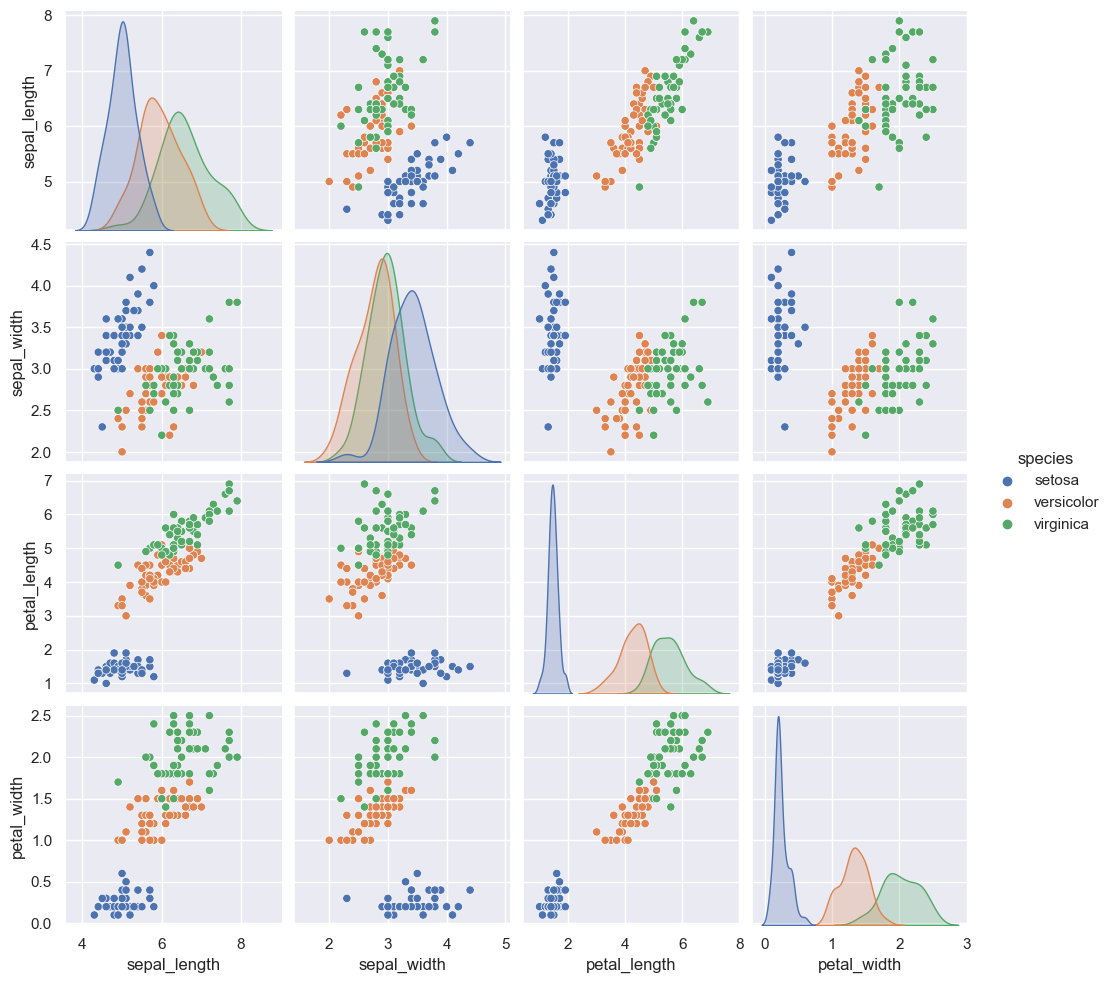

In [4]:
sns.set()
sns.pairplot(iris, hue="species")
plt.show()

In [5]:
X, y = iris[['petal_length', 'petal_width']].values, np.ravel(iris[['species']].values)

In [9]:
X, y = shuffle(X,y)
X_train = X[:90]
y_train = y[:90]
X_test = X[90:]
y_test = y[90:]

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

La distance utilisée par défaut est la distance euclidienne.

In [11]:
knn.score(X_test, y_test)

0.9666666666666667

## Question 15. — 

Quelle est la relation entre le score défini ci-dessus et le risque empirique?

## Question 16. — 

Calculer le prédicteur kNN pour $ k \in \{1, . . . , 20 \} $. Tracer les courbes des scores calculés sur les
échantillons d’apprentissage et de test respectivement. En déduire une valeur de k qui semble avoir produit le
meilleur prédicteur.

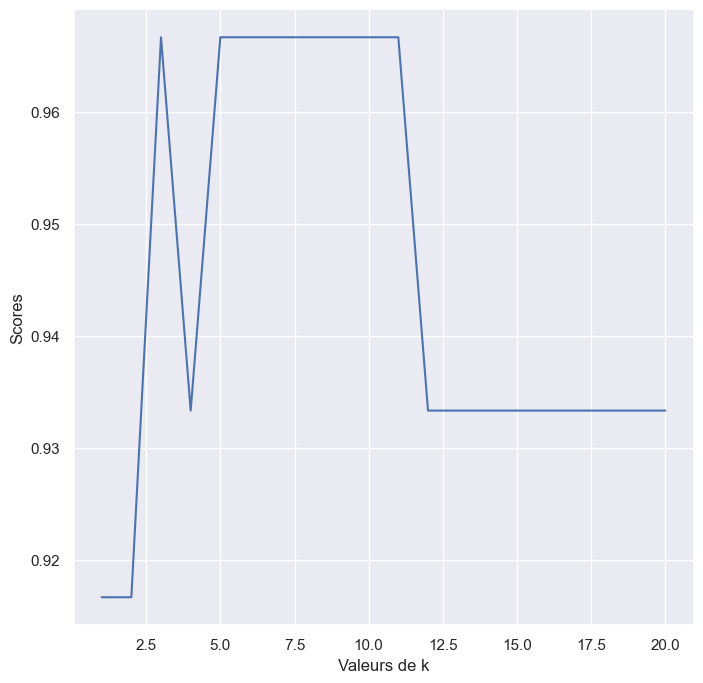

In [12]:
scores = []
for k in np.arange(20)+1:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure(figsize=(8,8))
plt.plot(np.arange(20)+1, scores, label = "Scores du knn pour différentes valeurs de k")
plt.xlabel("Valeurs de k")
plt.ylabel("Scores")
plt.show()

Valeur de k optimale : 5 

## Question 17. — 

En reprenant le code écrit précédemment, définir une fonction best_knn_score qui prend en
argument deux array X et y, construit les échantillons d’apprentissage et de test, calcule les prédicteurs kNN pour
k ∈ {1, . . . , 20}, et qui finalement renvoie le meilleur score calculé sur l’échantillon de test. Exécuter plusieurs fois
cette fonction. Que remarque-t-on? À quoi cela est-ce dû?

In [17]:
def best_knn_score(X,y):
    X, y = shuffle(X,y)
    X_train = X[:90]
    y_train = y[:90]
    X_test = X[90:]
    y_test = y[90:]
    scores = []
    for k in np.arange(20)+1:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    best_score = max(scores)
    k_max = scores.index(max(scores))
    return best_score, k_max
best_knn_score(X,y)

(0.9666666666666667, 3)

## Question 18. — 

Écrire une fonction best_knn_score_avg qui prend en argument des array X et y, qui exécute
100 fois best_knn_score(X,y) et qui renvoie la moyenne des 100 scores obtenus.
L’algorithme kNN est sensible à l’échelle utilisée pour chaque variable explicative. Pour s’en rendre compte, nous
allons modifier l’échelle d’une variable explicative et observer la conséquence sur la qualité du prédicteur obtenu.
On commence par créer une copie X_ de X.

In [18]:
def best_knn_score_avg(X,y):
    scores = []
    for i in range(100):
        best_score, k_max = best_knn_score(X,y)
        scores.append(best_score)
    return np.mean(scores)
best_knn_score_avg(X,y)

0.9704999999999999

# Question 19. — 

Modifier l’array X_ en convertissant les données d’une des deux variables explicatives des
centimètres aux mètres. L’utilisation de X_ au lieu de X affecte-t-elle la qualité des prédicteurs construits?
Recommencer en convertissant cette fois-ci l’autre variable explicative en mètres (et en gardant la première en
centimètres).
Lorsqu’on souhaite s’assurer que l’influence d’une variable explicative ne soit ni trop faible, ni trop élevée en raison
de son échelle, il est recommandée de normaliser les données. Autrement dit, pour chaque variable explicative, il
s’agit d’appliquer une transformation affine telle que les valeurs qui en résultent aient une moyenne nulle et un
écart-type égal à 1. scikit-learn propose une fonction pour cela.

In [23]:
X_ = X.copy()
X_[:,0] = X_[:,0] * 10**(-2)
best_knn_score_avg(X_,y)

0.9684999999999999

La qualité des prédicteurs est affectée.

In [24]:
X__ = X.copy()
X__[:,1] = X__[:,1] * 10**(-2)
best_knn_score_avg(X__,y)

0.9651666666666666

In [25]:
X_scaled = preprocessing.scale(X)
best_knn_score_avg(X_scaled,y)

0.9718333333333332

## Question 21. — 

Si on considère l’ensemble des 4 variables explicatives initialement disponibles, le prédicteur
obtenu est-il meilleur?

In [27]:
X_total, y_total = iris[['sepal_length', 'sepal_width','petal_length', 'petal_width']].values, np.ravel(iris[['species']].values)

In [29]:
best_knn_score_avg(X_total,y_total)

0.9758333333333333